In [20]:
import scanpy as sc
import anndata as ad

In [21]:
# Load the AnnData object
bone_marrow_adata = sc.read_h5ad(r"C:\Users\User\Downloads\bone_marrow.h5ad")
bone_marrow_adata.shape

(14783, 17374)

In [22]:
# Make gene/cell names unique to avoid confusion
bone_marrow_adata.var_names_make_unique()
bone_marrow_adata.obs_names_make_unique()
bone_marrow_adata

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [23]:
# Checked for Mitochondrial genes (MT)
bone_marrow_adata.var['MT'] = bone_marrow_adata.var['feature_name'].str.upper().str.startswith("MT-")
# Checked for Ribosomal genes (RPL/RPS)
bone_marrow_adata.var['RIBO'] = bone_marrow_adata.var['feature_name'].str.upper().str.startswith(("RPS","RPL"))
# Checked for Hemoglobin genes (HBA/HBB/HB)
bone_marrow_adata.var['HB'] = bone_marrow_adata.var['feature_name'].str.upper().str.startswith(("HB","HBA","HBB"))
bone_marrow_adata.var["MT"]

ENSG00000161920    False
ENSG00000122335    False
ENSG00000175548    False
ENSG00000100330    False
ENSG00000176340    False
                   ...  
ENSG00000176946    False
ENSG00000150456    False
ENSG00000284934    False
ENSG00000261842    False
ENSG00000260456    False
Name: MT, Length: 17374, dtype: bool

In [24]:
# Check which genes were flagged
print("MT genes:", bone_marrow_adata.var_names[bone_marrow_adata.var['MT']])
print("RIBO genes:", bone_marrow_adata.var["feature_name"][bone_marrow_adata.var['RIBO']])
print("HB genes:", bone_marrow_adata.var["feature_name"][bone_marrow_adata.var['HB']])


MT genes: Index(['ENSG00000228253', 'ENSG00000198899', 'ENSG00000198763',
       'ENSG00000198886', 'ENSG00000198804', 'ENSG00000198695',
       'ENSG00000212907', 'ENSG00000198888', 'ENSG00000198712',
       'ENSG00000198727', 'ENSG00000198938', 'ENSG00000198840',
       'ENSG00000198786'],
      dtype='object')
RIBO genes: ENSG00000197958      RPL12
ENSG00000117676    RPS6KA1
ENSG00000122026      RPL21
ENSG00000174444       RPL4
ENSG00000089157      RPLP0
                    ...   
ENSG00000171863       RPS7
ENSG00000147403      RPL10
ENSG00000071242    RPS6KA2
ENSG00000114391      RPL24
ENSG00000140988       RPS2
Name: feature_name, Length: 101, dtype: category
Categories (17369, object): ['A1BG', 'A1BG-AS1', 'A2M', 'A2M-AS1', ..., 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3']
HB genes: ENSG00000086506     HBQ1
ENSG00000112339    HBS1L
ENSG00000105856     HBP1
ENSG00000196565     HBG2
ENSG00000113070    HBEGF
ENSG00000223609      HBD
ENSG00000188536     HBA2
ENSG00000244734      HBB
ENSG0000020

In [25]:
# Calculated qc metrics
sc.pp.calculate_qc_metrics(bone_marrow_adata, qc_vars=["MT", "RIBO", "HB"], inplace=True, log1p=True )
bone_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_RIBO,log1p_total_counts_RIBO,pct_counts_RIBO,total_counts_HB,log1p_total_counts_HB,pct_counts_HB
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,40.537370,138.356339,4.937034,1.154665,879.968079,6.781022,7.343850,0.000000,0.000000,0.000000
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,57.850376,113.859787,4.743712,1.350507,914.212402,6.819156,10.843602,0.000000,0.000000,0.000000
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,59.749640,125.068520,4.836825,1.543431,952.813843,6.860468,11.758374,26.952686,3.330513,0.332615
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,56.156243,103.474380,4.648942,1.182754,924.013672,6.829809,10.561848,8.858533,2.288337,0.101257
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,100.000121,138.531082,4.938287,2.870118,850.272156,6.746732,17.616129,0.000000,0.000000,0.000000


In [20]:
bone_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding,False,False,False,885,0.502831,0.407351,94.013394,7433.353516,8.913867
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding,False,False,False,405,0.231814,0.208488,97.260367,3426.911377,8.139707
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding,False,False,False,142,0.082084,0.078889,99.039437,1213.443970,7.102042
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding,False,False,False,404,0.227307,0.204822,97.267131,3360.278564,8.120077
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding,False,False,False,6898,4.277597,1.663471,53.338294,63235.750000,11.054641


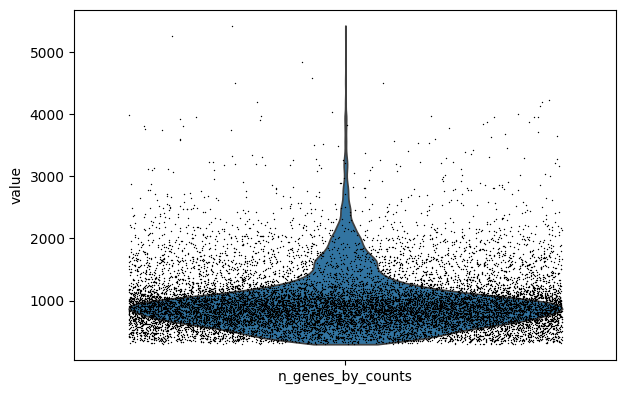

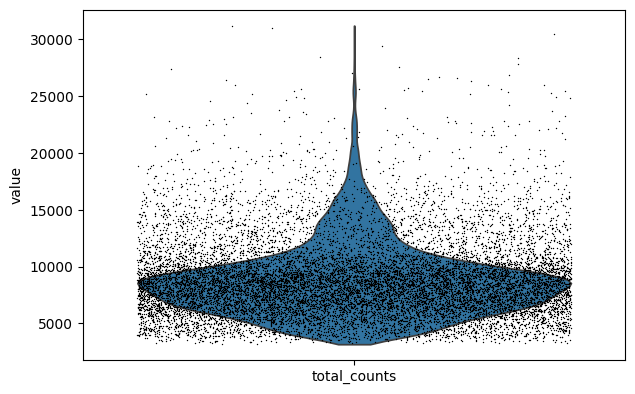

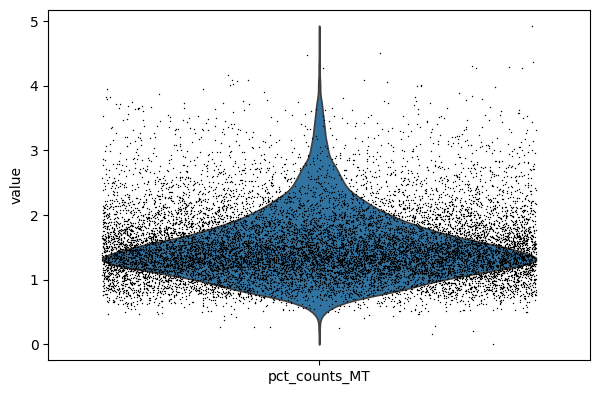

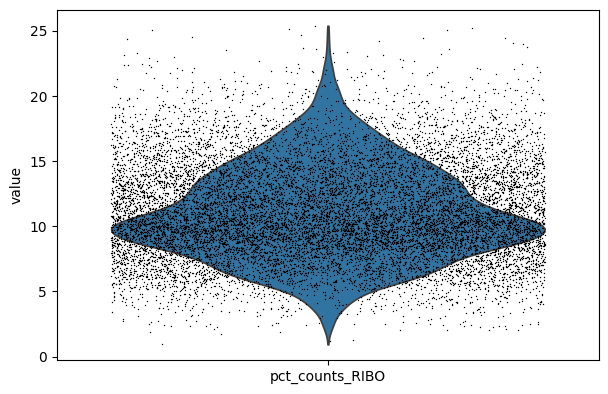

In [26]:
# what is the average number of genes that were detected at least once in each cell.. # in other words, the number of genes expressed in each cell
sc.pl.violin( bone_marrow_adata, ["n_genes_by_counts"], jitter=0.4, multi_panel=False, )
#What is the total number of molecules (UMI) detected in a cell.
sc.pl.violin( bone_marrow_adata, ["total_counts"], jitter=0.4, multi_panel=False, )
# For mitochondrial genes?
sc.pl.violin( bone_marrow_adata, ["pct_counts_MT"], jitter=0.4, multi_panel=False, )
# For Ribosomal genes?
sc.pl.violin( bone_marrow_adata, ["pct_counts_RIBO"], jitter=0.4, multi_panel=False, )

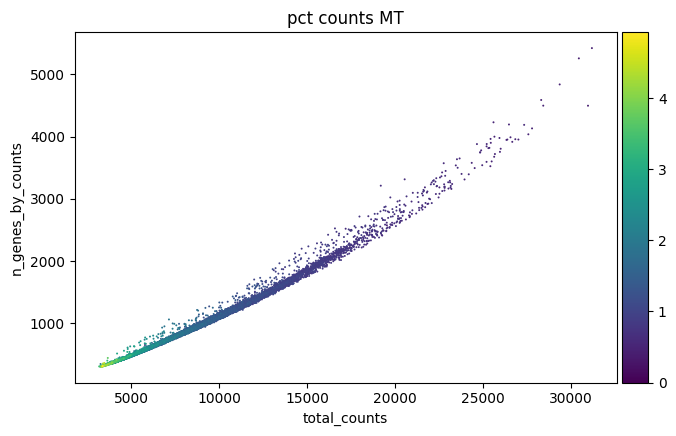

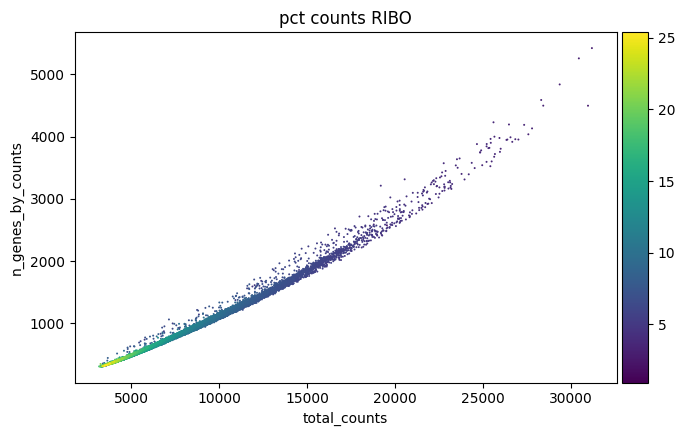

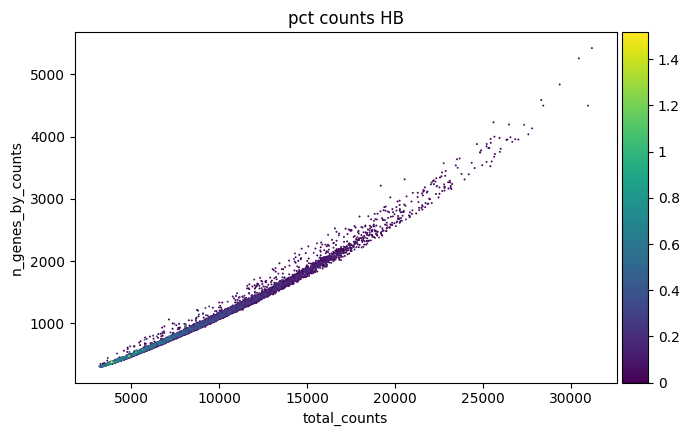

In [27]:
# Checked for stressed cells or potential doublets
sc.pl.scatter(bone_marrow_adata, x="total_counts", y="n_genes_by_counts", color="pct_counts_MT")
sc.pl.scatter(bone_marrow_adata, x="total_counts", y="n_genes_by_counts", color="pct_counts_RIBO")
sc.pl.scatter(bone_marrow_adata, x="total_counts", y="n_genes_by_counts", color="pct_counts_HB")

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\preprocessing\_simple.py:176: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


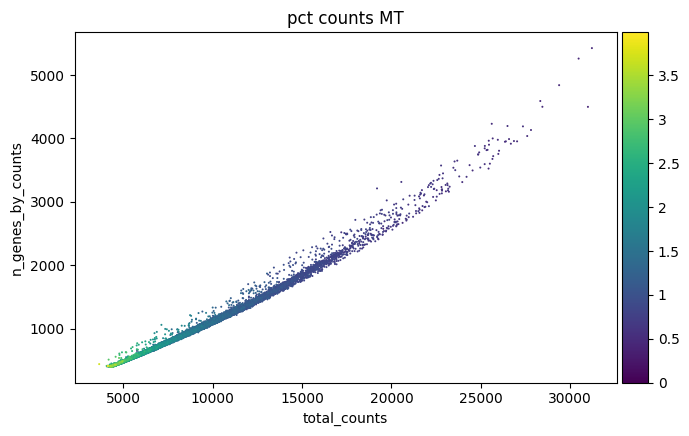

In [29]:
# filtering
sc.pp.filter_cells(bone_marrow_adata, min_genes=400)
sc.pp.filter_genes(bone_marrow_adata, min_cells=3)

# filtered stressed cells
bone_marrow_adata = bone_marrow_adata[bone_marrow_adata.obs['pct_counts_MT'] < 5]
sc.pl.scatter(bone_marrow_adata, x="total_counts", y="n_genes_by_counts", color="pct_counts_MT")

In [30]:
sc.pp.scrublet(
    bone_marrow_adata,
    expected_doublet_rate=0.06,  
    n_neighbors=30,
    use_approx_neighbors=True
)


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\preprocessing\_scrublet\__init__.py:295: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["doublet_score"] = scrubbed["obs"]["doublet_score"]


In [31]:
# Save a copy of the data
bone_marrow_adata.layers["counts"] = bone_marrow_adata.X.copy()
# Normalizing to median total counts
sc.pp.normalize_total(bone_marrow_adata)
# Logarithmize the data
sc.pp.log1p(bone_marrow_adata)

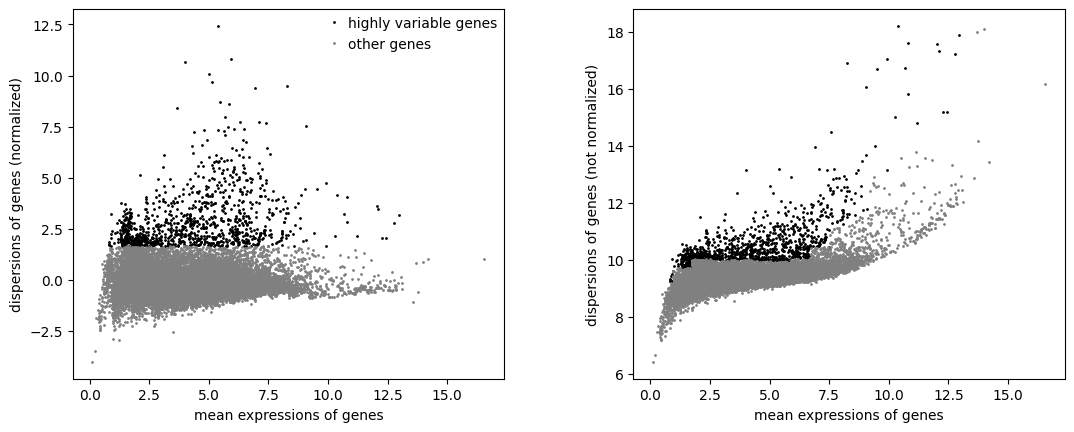

In [17]:
#Feature selection
#selecting the top 1000 most variable genes
sc.pp.highly_variable_genes(bone_marrow_adata, n_top_genes=1000)
     

sc.pl.highly_variable_genes(bone_marrow_adata)

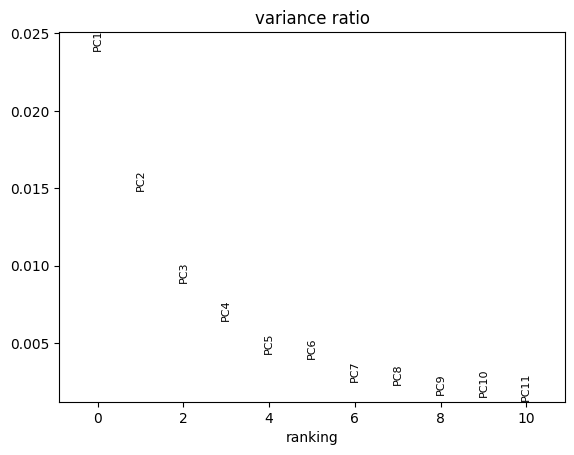

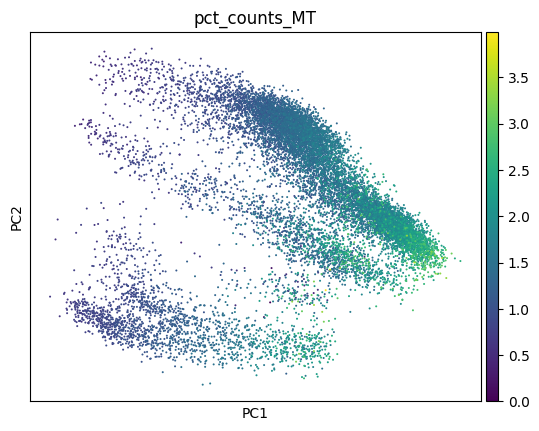

In [32]:
# Dimensionality reduction to reduce data complexity and highlight key variation patterns
sc.tl.pca(bone_marrow_adata)
sc.pl.pca_variance_ratio(bone_marrow_adata, n_pcs=10, log=False)
sc.pl.pca( bone_marrow_adata, color=["pct_counts_MT"] )

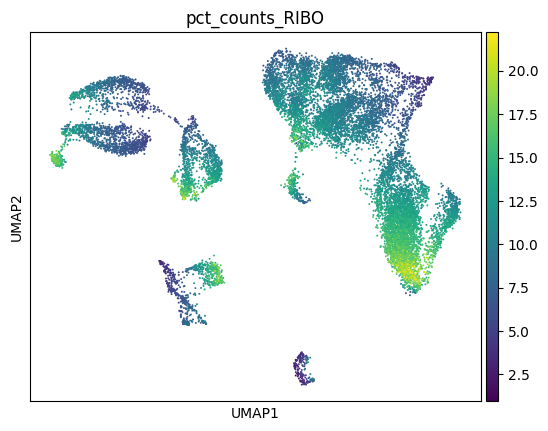

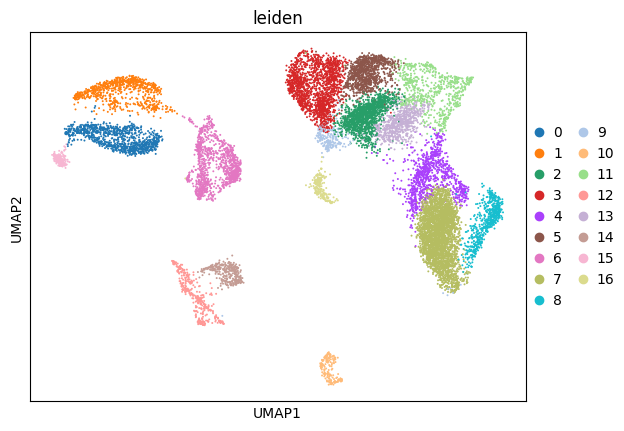

In [33]:
# Checked for the nearest neighbors
sc.pp.neighbors(bone_marrow_adata)
sc.tl.umap(bone_marrow_adata)
sc.pl.umap( bone_marrow_adata, color=["pct_counts_RIBO"], size=8, )
# Clustered by communities
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2)
sc.pl.umap( bone_marrow_adata, color=["leiden"], size=8,)

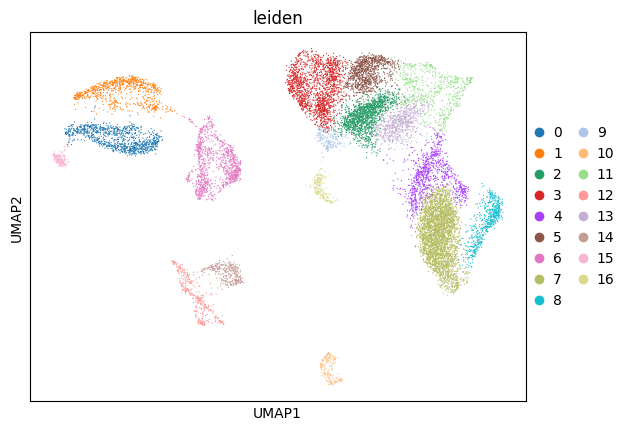

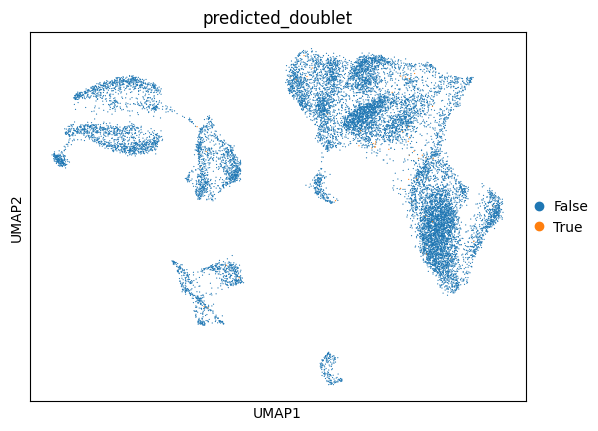

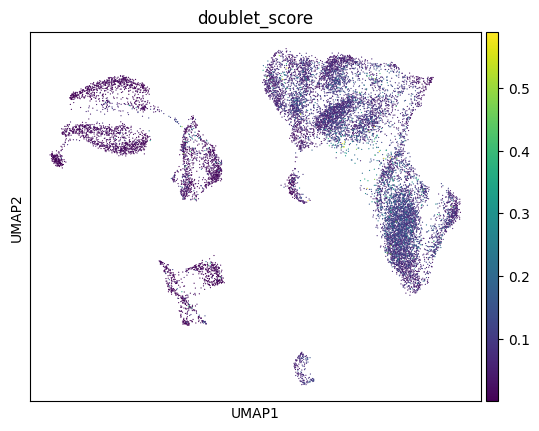

In [34]:
# Checked for the number of cells and doublets
sc.pl.umap( bone_marrow_adata, color=["leiden"], wspace=0.5, size=3, ncols = 1 )
sc.pl.umap( bone_marrow_adata, color=[ "predicted_doublet"], wspace=0.5, size=3, ncols = 1 )
sc.pl.umap( bone_marrow_adata, color=[ "doublet_score"], wspace=0.5, size=3, ncols = 1 )

In [35]:
# Further Clustering
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_02", resolution=0.02)
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res2", resolution=2)

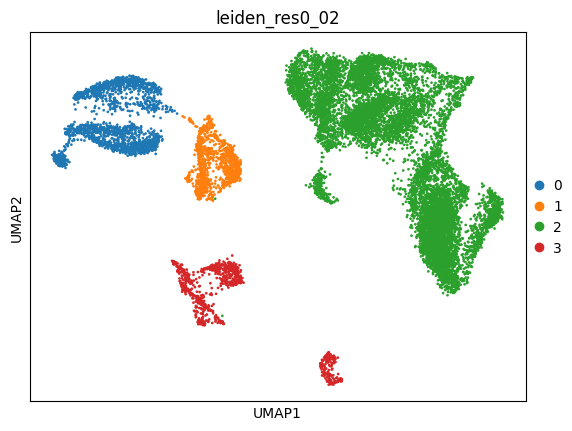

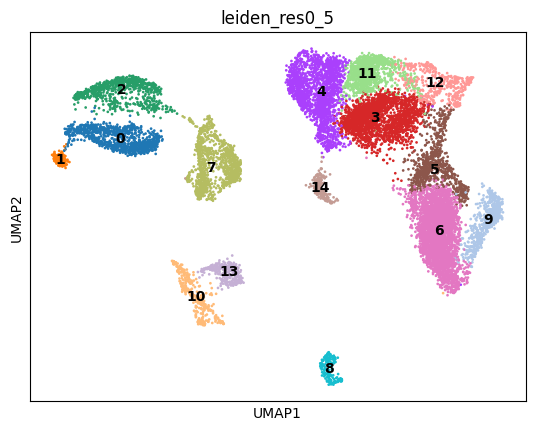

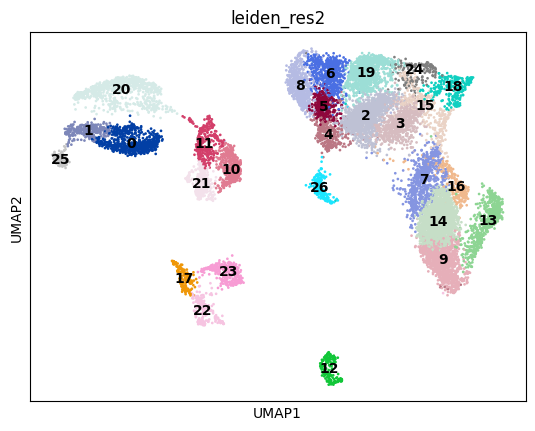

In [36]:
sc.pl.umap( bone_marrow_adata, color=["leiden_res0_02"], wspace=0.5, size=15, ncols = 1 )
sc.pl.umap( bone_marrow_adata, color=["leiden_res0_5"], wspace=0.5, size=15, ncols = 1, legend_loc="on data")
sc.pl.umap( bone_marrow_adata, color=["leiden_res2"], wspace=0.5, size=15, ncols = 1,  legend_loc="on data")

In [37]:
import requests

url = "http://www.ensembl.org/biomart/martservice?query=<?xml version='1.0' encoding='UTF-8'?><!DOCTYPE Query><Query  virtualSchemaName = 'default' formatter = 'CSV' header = '0' uniqueRows = '0' count = '' datasetConfigVersion = '0.6' ><Dataset name = 'hsapiens_gene_ensembl' interface = 'default' ><Attribute name = 'ensembl_gene_id' /><Attribute name = 'external_gene_name' /></Dataset></Query>"

r = requests.get(url)
with open(r"C:\Users\User\Downloads\result.txt", "wb") as f:
    f.write(r.content)

In [38]:
import pandas as pd
ensembl_var = pd.read_csv(r"C:\Users\User\Downloads\result.txt", header=None)
ensembl_var.columns = ['ensembl_gene_id', 'gene_name']
ensembl_var.head(3)

,ensembl_gene_id,gene_name
0,ENSG00000210049,MT-TF
1,ENSG00000211459,MT-RNR1
2,ENSG00000210077,MT-TV


In [39]:
import decoupler as dc
# Query Omnipath and get PanglaoDB
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
#markers = markers[markers["canonical_marker"]]

# Remove duplicated entries
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

#Format because dc only accepts cell_type and genesymbol

markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]


markers.head()

,source,target
,,
0,Hepatocytes,A1CF
1,Germ cells,A2APA5
2,Bergmann glia,A2M
3,Mast cells,A3FIN4
4,Mast cells,A4GALT


In [40]:
#correct target to ensemble
markers = markers.merge(ensembl_var, left_on="target", right_on="gene_name", how="left")
markers = markers.drop(columns=["target"])
# Remove duplicated entries
markers = markers[~markers.duplicated(["source", "ensembl_gene_id"])]

#Format because dc only accepts cell_type and genesymbol
markers = markers.rename(columns={"source": "source", "ensembl_gene_id": "target"})

markers = markers[["source", "target"]]
markers = markers.dropna()

markers.head()

,source,target
0,Hepatocytes,ENSG00000148584
2,Bergmann glia,ENSG00000175899
4,Mast cells,ENSG00000128274
6,Interneurons,ENSG00000115977
7,Neurons,ENSG00000115977


In [41]:
#load the gene expression matrix into dc

dc.mt.ulm(data=bone_marrow_adata, net=markers, tmin = 3)
     

#retrieve the score for each cell type

score = dc.pp.get_obsm(bone_marrow_adata, key="score_ulm")
score

AnnData object with n_obs × n_vars = 14215 × 163
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', '

In [ ]:
# Previewed the data
bone_marrow_adata.obsm["score_ulm"].head()

,Acinar cells,Adipocyte progenitor cells,Adipocytes,Adrenergic neurons,Airway goblet cells,Alpha cells,Alveolar macrophages,Anterior pituitary gland cells,Astrocytes,B cells,...,Tanycytes,Taste receptor cells,Thymocytes,Transient cells,Trigeminal neurons,Trophoblast cells,Tuft cells,Undefined placental cells,Urothelial cells,Vascular smooth muscle cells
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.882368,-0.983279,0.462792,-0.592810,-1.027034,0.730699,5.185693,-0.233682,0.243179,1.138097,...,0.543669,0.291259,-0.543771,0.495860,-0.939276,-0.363350,3.113546,-0.784287,-0.784287,-0.513372
Guo-AAACCTGAGAGGTTGC-7,-0.906533,-0.776215,-1.485997,-0.467975,-0.810754,1.468507,-0.061098,0.232684,0.116530,-0.118259,...,0.897724,0.768394,3.847437,-0.965137,-0.441331,-0.965137,-0.202578,-0.619130,-0.619130,-0.405266
Guo-AAACCTGAGATACACA-3,-0.892573,-0.764261,-0.381196,-0.460769,-0.798269,1.460147,-0.067138,-0.892573,1.595200,3.543385,...,0.924924,-0.691258,1.906058,0.177953,0.415599,1.259828,0.851037,-0.609595,-0.609595,-0.399025
Guo-AAACCTGAGCGATTCT-1,-0.922395,-0.789795,-0.510583,-0.476163,-0.824940,0.199093,-0.095906,0.199093,0.724401,3.823634,...,-0.673478,-0.714353,0.929077,-0.982024,0.330732,0.140764,1.708718,-0.629962,-0.629962,-0.412357
Guo-AAACCTGAGTGAAGAG-3,-0.643754,-0.551212,0.029945,-0.332325,-0.575740,-0.643754,0.583929,0.930945,-0.008435,1.961606,...,-0.470034,-0.498561,-0.761835,-0.685369,-0.895474,-0.685369,1.786741,-0.439663,-0.439663,-0.287793


In [43]:
bone_marrow_adata.obsm["score_ulm"].columns

Index(['Acinar cells', 'Adipocyte progenitor cells', 'Adipocytes',
       'Adrenergic neurons', 'Airway goblet cells', 'Alpha cells',
       'Alveolar macrophages', 'Anterior pituitary gland cells', 'Astrocytes',
       'B cells',
       ...
       'Tanycytes', 'Taste receptor cells', 'Thymocytes', 'Transient cells',
       'Trigeminal neurons', 'Trophoblast cells', 'Tuft cells',
       'Undefined placental cells', 'Urothelial cells',
       'Vascular smooth muscle cells'],
      dtype='object', length=163)

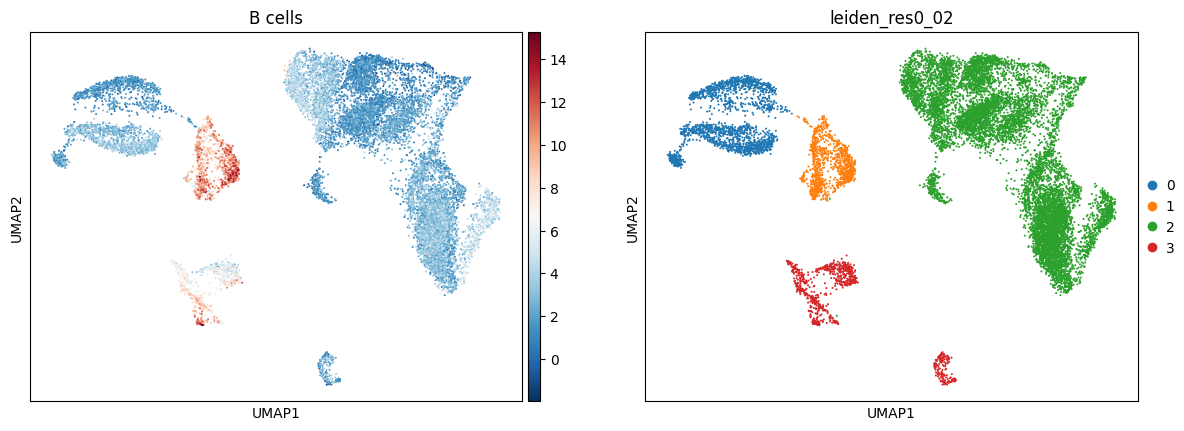

In [65]:
sc.pl.umap(score, color=["B cells", "leiden_res0_02"], cmap="RdBu_r")

In [46]:

import seaborn as sns

2025-11-26 04:28:05 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-26 04:28:06 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-26 04:28:06 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-26 04:28:06 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-26 04:28:06 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

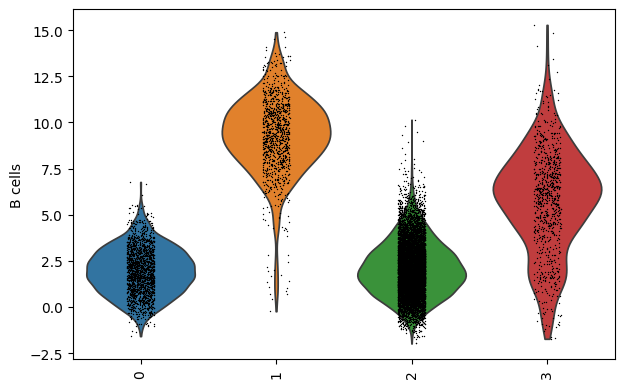

In [66]:
sc.pl.violin(score, keys=["B cells"], groupby="leiden_res0_02", rotation=90)

In [67]:
#rank genes
bone_marrow_adata_rank = dc.tl.rankby_group(score, groupby="leiden_res0_02", reference="rest", method="t-test_overestim_var")
bone_marrow_adata_rank = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0]
bone_marrow_adata_rank.head()

,group,reference,name,stat,meanchange,pval,padj
0,0,rest,Monocytes,206.437793,10.552161,0.0,0.0
1,0,rest,Neutrophils,127.021753,5.820424,0.0,0.0
2,0,rest,Dendritic cells,124.880519,5.434793,0.0,0.0
3,0,rest,Macrophages,124.582884,5.629912,0.0,0.0
4,0,rest,Microglia,100.928185,4.162388,0.0,0.0


In [68]:
cluster_annotations = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()

C:\Users\User\AppData\Local\Temp\ipykernel_4624\243225156.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_annotations = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


In [69]:
cluster_annotations

{'0': 'Monocytes', '2': 'T cells', '1': 'B cells naive', '3': 'Plasma cells'}

In [57]:
bone_marrow_adata.obs['cell_type'] = bone_marrow_adata.obs['leiden_res0_02'].map(cluster_annotations) 

# Example of how to subset for multiple genes in the 'source' column
available_genes = set(bone_marrow_adata.var_names)

b_cell_markers = markers[markers['source'].isin(['B cells memory'])]['target']
b_cell_markers = b_cell_markers[b_cell_markers.isin(available_genes)]

nk_cell_markers = markers[markers['source'].isin(['Natural killer T cells'])]['target']
nk_cell_markers = nk_cell_markers[nk_cell_markers.isin(available_genes)]

t_cells_markers = markers[markers['source'].isin(['T cells'])]['target']
t_cells_markers = t_cells_markers[t_cells_markers.isin(available_genes)]

b_cell_markers

142     ENSG00000042980
331     ENSG00000163568
387     ENSG00000012779
719     ENSG00000112182
724     ENSG00000153064
789     ENSG00000136573
1164    ENSG00000112486
1200    ENSG00000134061
1203    ENSG00000177455
1211    ENSG00000158481
1232    ENSG00000012124
1256    ENSG00000139193
1292    ENSG00000104894
1294    ENSG00000004468
1380    ENSG00000110848
1391    ENSG00000137101
1399    ENSG00000105369
1405    ENSG00000007312
1409    ENSG00000121594
1419    ENSG00000066294
1425    ENSG00000114013
1928    ENSG00000117322
2140    ENSG00000160683
2293    ENSG00000170456
2850    ENSG00000072694
2869    ENSG00000132704
3355    ENSG00000176533
3412    ENSG00000125245
3636    ENSG00000152804
3734    ENSG00000241106
4068    ENSG00000211898
4090    ENSG00000211899
4099    ENSG00000211592
4231    ENSG00000104432
4298    ENSG00000140968
5061    ENSG00000227507
5107    ENSG00000112799
5406    ENSG00000156738
5877    ENSG00000196436
5965    ENSG00000135318
6190    ENSG00000083454
6292    ENSG0000

categories: Monocytes, B cells naive, T cells, etc.
var_group_labels: B cells, NK cells, T cells


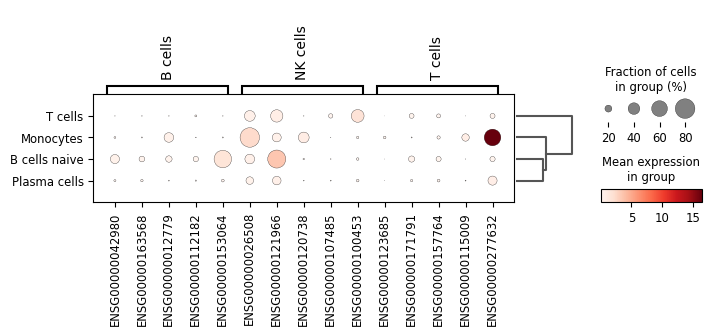

In [58]:
# Other methods of visualization
marker_genes_dict = {
    "B cells": b_cell_markers.head().tolist(),
    "NK cells": nk_cell_markers.head().tolist(),
    "T cells": t_cells_markers.head().tolist()
}

sc.pl.dotplot(bone_marrow_adata, marker_genes_dict, "cell_type", dendrogram=True)

categories: 0, 1, 2, etc.
var_group_labels: B cells, NK cells, T cells


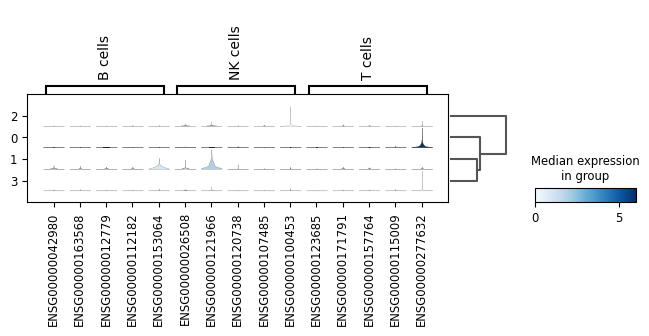

In [59]:
sc.pl.stacked_violin(
    bone_marrow_adata, marker_genes_dict, groupby="leiden_res0_02",  dendrogram=True)

categories: 0, 1, 2, etc.
var_group_labels: B cells, NK cells, T cells


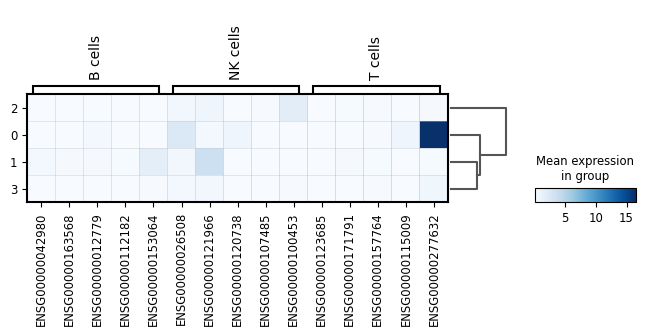

In [60]:
sc.pl.matrixplot(
    bone_marrow_adata,
    marker_genes_dict,
    "leiden_res0_02",
    dendrogram=True,
    cmap="Blues",
)

categories: 0, 1, 2, etc.
var_group_labels: B cells, NK cells, T cells


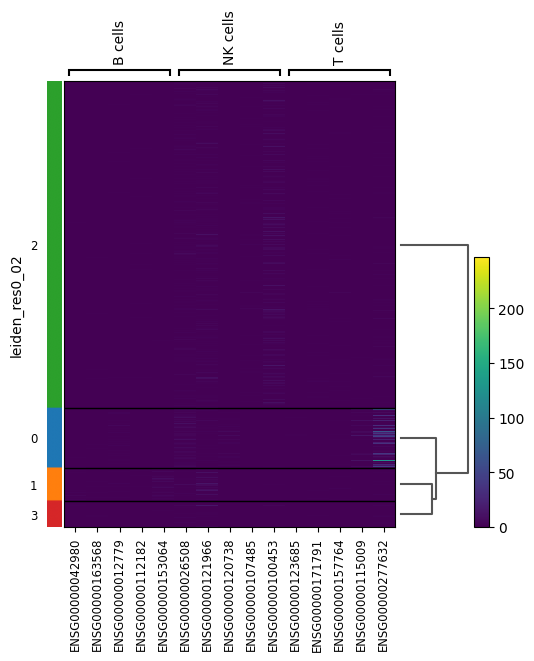

In [63]:
sc.pl.heatmap(
    bone_marrow_adata, marker_genes_dict, groupby="leiden_res0_02", cmap="viridis", dendrogram=True)

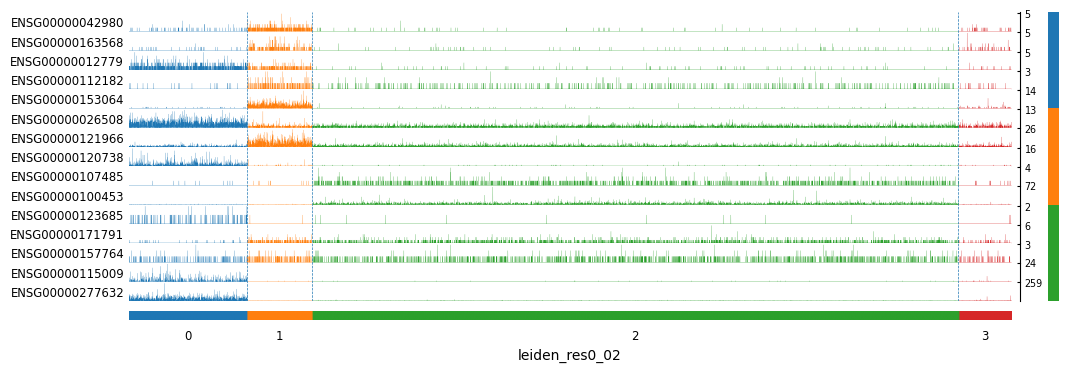

In [64]:
# title Using genome tracks
sc.pl.tracksplot(bone_marrow_adata, marker_genes_dict, groupby="leiden_res0_02", dendrogram=False)